<a href="https://colab.research.google.com/github/ReyhaneTaj/PINNs/blob/main/ForwardMode_Ln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q deepxde tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.5 MB/s eta 0:00:00


Compiling model...
Building feed-forward neural network...
'build' took 0.072388 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.363296 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.17e-02, 4.77e+01]    [8.13e-03, 4.77e+01]    [9.37e-01]    
1000      [3.71e-04, 6.83e-08]    [3.48e-04, 6.83e-08]    [6.31e-03]    
2000      [1.96e-05, 6.15e-10]    [1.55e-05, 6.15e-10]    [6.95e-04]    
3000      [6.17e-06, 1.10e-10]    [4.49e-06, 1.10e-10]    [3.54e-04]    
4000      [1.32e-06, 2.05e-12]    [7.86e-07, 2.05e-12]    [1.38e-04]    
5000      [1.09e-05, 9.67e-07]    [7.79e-06, 9.67e-07]    [6.09e-04]    
6000      [2.68e-06, 4.98e-09]    [1.30e-06, 4.98e-09]    [1.69e-04]    
7000      [5.98e-06, 1.36e-06]    [3.07e-06, 1.36e-06]    [5.49e-04]    
8000      [8.05e-07, 3.64e-12]    [4.51e-07, 3.64e-12]    [8.91e-05]    
9000      [1.05e-06, 8.43e-08]    [4.67e-07, 8.43e-08]    [9.42e-05]    
10000     [5.47e-07, 5.12e-11]    [3.36e-07, 5.12e-11]    [6.38e-05]    
11000     [9.56e-06, 3.31e-05]    [9.71e-06, 3.31e-05]    [1.32e-03]    
12000

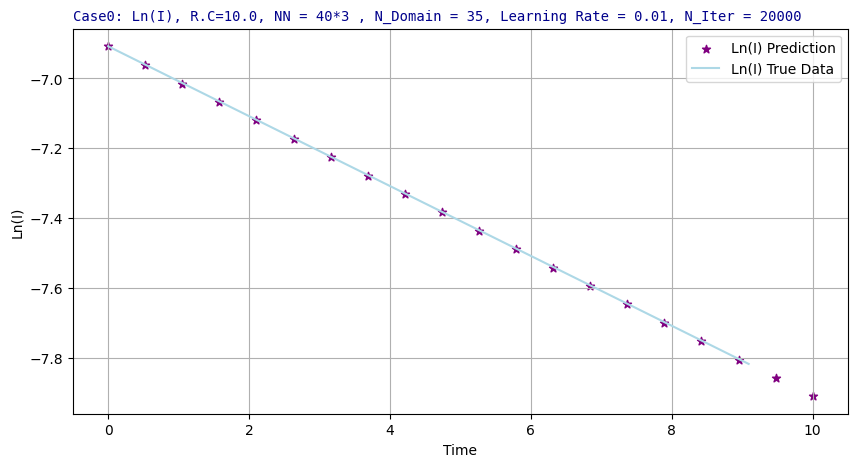

In [ ]:
###### Ln_Case0 #####
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import matplotlib.pyplot as plt
import tensorflow as tf
import deepxde as dde
import numpy as np
import random

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#Constant parameters.
R = 1000.0
C = 0.01
U = 1.0
RC=R*C
#Time limit.
T=10.0

#NN architecture
n = 40
l = 3
Lr = 0.01
N_Iter = 20000
N_Col = 35
###########


def ode_system(x, ln_I):
    """ODE for d(ln(I)/dx) + 1/(RC) = 0"""
    dln_I_dx = dde.grad.jacobian(ln_I, x)
      # Calculate the derivative of ln(I) directly
    return dln_I_dx + 1 / (R * C)

def func(x):
    """Exact solution for d(ln(I)/dx) + 1/(RC) = 0"""
    # The exact solution
    return (-x/ (R*C))+ np.log(U/R)

geom = dde.geometry.TimeDomain(0, T)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return np.log(U/R)  # Initial condition is constant

ic = dde.icbc.IC(geom, lambda x: np.log(U/R), boundary,component=0)  # Initial condition

data = dde.data.PDE(geom, ode_system, [ic], N_Col, 1, solution=func, num_test=10)

layer_size = [1] + [n] * l + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=Lr, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations= N_Iter)


# Generate time points for prediction
t_pred = np.linspace(0, T, 20).reshape(-1, 1)  # Reshape for compatibility with the model
ln_I_pred = model.predict(t_pred)

t_true = data.test_x
ln_I_true = data.test_y

#t_train = data.train_x
#ln_I_train = data.train_y


plt.figure(figsize=(10, 5))
plt.scatter(t_pred, ln_I_pred, label='Ln(I) Prediction', c='purple', marker='*')
#plt.scatter(t_train, ln_I_train, label='Ln(I) Training Data', c='orange', marker='o')
plt.plot(t_true, ln_I_true, label='Ln(I) True Data', c='lightblue')
plt.xlabel('Time')
plt.ylabel('Ln(I)')
plt.legend()
plt.title(f'Case0: Ln(I), R.C={RC}, NN = {n}*{l} , N_Domain = {N_Col}, Learning Rate = {Lr}, N_Iter = {N_Iter}', loc='left', fontdict={'family': 'monospace', 'color':  'darkblue', 'weight': 'normal', 'size': 10})
plt.grid(True)
plt.show()

In [ ]:
!pip install -q deepxde tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
!pip install -q --upgrade deepxde


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 833.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.0 MB/s eta 0:00:00


Compiling model...
Building feed-forward neural network...
'build' took 0.064928 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.407284 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [2.65e-02, 3.37e+01]    [2.37e-02, 3.37e+01]    [1.06e+00]    
1000      [4.45e-05, 1.55e-08]    [3.87e-05, 1.55e-08]    [1.12e-03]    
2000      [8.21e-06, 5.46e-10]    [6.24e-06, 5.46e-10]    [4.84e-04]    
3000      [4.78e-06, 8.19e-12]    [3.68e-06, 8.19e-12]    [3.10e-04]    
4000      [3.35e-06, 1.84e-11]    [2.56e-06, 1.84e-11]    [2.49e-04]    
5000      [2.28e-06, 5.68e-12]    [1.74e-06, 5.68e-12]    [2.03e-04]    
6000      [1.72e-06, 8.21e-11]    [1.35e-06, 8.21e-11]    [1.67e-04]    
7000      [1.50e-06, 1.12e-07]    [1.27e-06, 1.12e-07]    [1.24e-04]    
8000      [3.57e-06, 2.07e-05]    [2.54e-06, 2.07e-05]    [9.76e-04]    
9000      [6.91e-07, 6.27e-06]    [6.23e-07, 6.27e-06]    [4.32e-04]    
10000     [5.47e-07, 1.49e-08]    [4.13e-07, 1.49e-08]    [8.57e-05]    
11000     [4.83e-07, 8.16e-06]    [4.18e-07, 8.16e-06]    [4.64e-04]    
12000

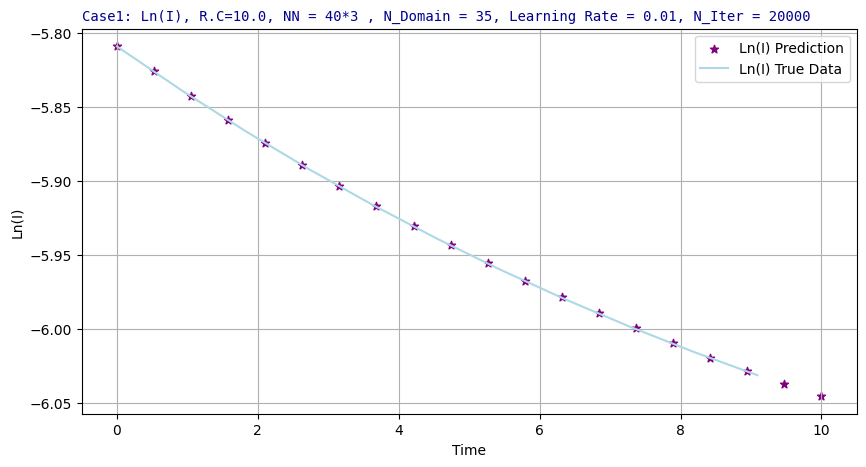

<Figure size 640x480 with 0 Axes>

In [ ]:
###### Ln_Case1 ######
import matplotlib.pyplot as plt
import tensorflow as tf
import deepxde as dde
import numpy as np
import random


#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Define desired values for the parameters
R_r = 500.0
R_1 = 1000.0
C_1 = 0.01
U_dc = 1.0
RC=R_1*C_1
#Time limit.
T=10.0

###########
#NN architecture
n = 40
l = 3
Lr = 0.01
N_Iter = 20000
N_Col = 35
###########


def ode_system(x, ln_I):
    """ODE for d(Ln(I))/dt+1/(R_1*C_1)-(U_dc/R_0*R_1*C_1)*exp(-Ln(I))=0 """
    dln_I_dx = dde.grad.jacobian(ln_I, x)

    return dln_I_dx + 1/(R_1*C_1)*(1 - ((U_dc/R_r) * (tf.exp(-ln_I))))

def func(x):
    """Exact solution for d(Ln(I))/dt+1/(R_1*C_1)-U_dc/R_0*exp(-Ln(I))=0"""
    # The exact solution

    return np.log((U_dc/R_1) * ((np.exp(-x/(R_1 * C_1)))) + (U_dc/R_r))

geom = dde.geometry.TimeDomain(0, T)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return  np.log(U_dc * (1/R_r + 1/R_1))

ic = dde.icbc.IC(geom, lambda x: np.log(U_dc * (1/R_r + 1/R_1)), boundary,component=0) # Initial condition

data = dde.data.PDE(geom, ode_system, [ic], N_Col, 1, solution=func, num_test=10)

layer_size = [1] + [n] * l + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr= Lr, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations = N_Iter)

# Generate time points for prediction
t_pred = np.linspace(0, T, 20).reshape(-1, 1)  # Reshape for compatibility with the model
ln_I_pred = model.predict(t_pred)

t_true = data.test_x
ln_I_true = data.test_y

t_train = data.train_x
ln_I_train = data.train_y


plt.figure(figsize=(10, 5))
plt.scatter(t_pred, ln_I_pred, label='Ln(I) Prediction', c='purple', marker='*')
#plt.scatter(t_train, ln_I_train, label='Ln(I) Training Data', c='orange', marker='o')
plt.plot(t_true, ln_I_true, label='Ln(I) True Data', c='lightblue')
plt.xlabel('Time')
plt.ylabel('Ln(I)')
plt.legend()
plt.title(f'Case1: Ln(I), R.C={RC}, NN = {n}*{l} , N_Domain = {N_Col}, Learning Rate = {Lr}, N_Iter = {N_Iter}', loc='left', fontdict={'family': 'monospace', 'color':  'darkblue', 'weight': 'normal', 'size': 10})
plt.grid(True)
plt.show()

# Save the figure as an image (e.g., PNG)
plt.savefig('figure.png')


In [ ]:
!pip install -q deepxde


In [ ]:
!pip install -q --upgrade jax jaxlib

Compiling model...
Building feed-forward neural network...
'build' took 0.088843 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.250496 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.22e-02, 4.41e-02, 3.86e+01, 4.77e+01]    [7.13e-03, 2.83e-02, 3.86e+01, 4.77e+01]    [1.02e+00]    
1000      [2.04e-04, 7.23e-04, 9.26e-08, 2.70e-09]    [1.85e-04, 3.99e-04, 9.26e-08, 2.70e-09]    [1.13e-02]    
2000      [4.04e-06, 2.07e-05, 7.37e-11, 1.54e-10]    [3.29e-06, 7.42e-06, 7.37e-11, 1.54e-10]    [9.52e-04]    
3000      [3.67e-06, 5.27e-06, 1.11e-11, 5.68e-12]    [2.84e-06, 2.08e-06, 1.11e-11, 5.68e-12]    [5.49e-04]    
4000      [9.13e-06, 4.84e-05, 4.08e-06, 8.59e-05]    [7.63e-06, 5.02e-05, 4.08e-06, 8.59e-05]    [4.91e-03]    
5000      [3.83e-06, 2.79e-06, 2.45e-07, 4.22e-06]    [2.91e-06, 1.25e-06, 2.45e-07, 4.22e-06]    [8.01e-04]    
6000      [3.76e-06, 2.77e-06, 5.68e-06, 7.19e-06]    [2.83e-06, 9.51e-07, 5.68e-06, 7.19e-06]    [8.79e-04]    
7000      [3.07e-06, 2.12e-06, 9.09e-13, 1.91e-10]

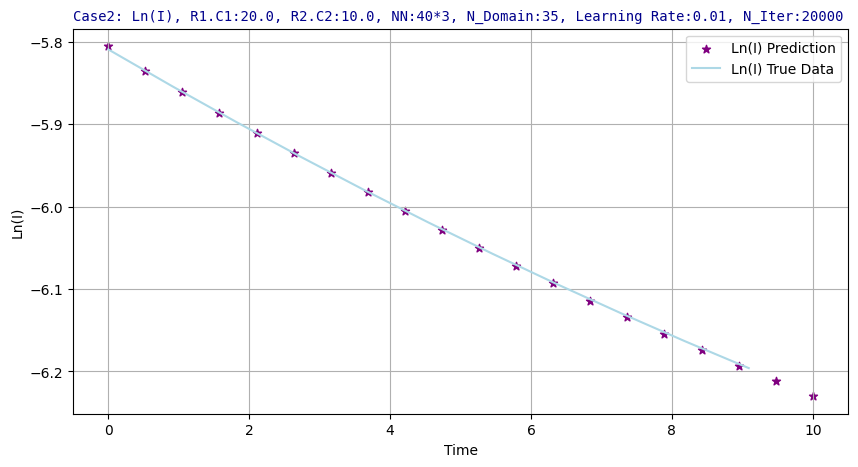

In [ ]:
#######...Ln_Case2...#######
import deepxde as dde
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Define desired values for the parameters
R_0 = 1000.0
R_1 = 1000.0
R_2 = 1000.0
C_1 = 0.02
C_2 = 0.01
U_dc = 1.0

RC1=R_1*C_1
RC2=R_2*C_2

n = 40
l = 3
Lr = 0.01
N_Iter = 20000
N_Col = 35
###########
#Time limit.
T=10.0

###########
num_test=10
LR = 0.01

#define the differential equation
def ode_system(t, ln_I):
    """ODE system.
    d(Ln(I1))/dt+1/(R_1*C_1)-(U_dc/R_0*R_1*C_1)*exp(-Ln(I1))=0
    d(ln(I2)/dx) + 1/(R_2*C_2) = 0
    """
    # Most backends
    ln_I1, ln_I2 = ln_I[:, 0:1], ln_I[:, 1:]
    dln_I1_t = dde.grad.jacobian(ln_I, t, i=0)
    dln_I2_t = dde.grad.jacobian(ln_I, t, i=1)
    # Backend jax
    # I_val, I_fn = y
    # I1, I2 = I_val[:, 0:1], I_val[:, 1:]
    # dI1_t, _ = dde.grad.jacobian(I, t, i=0)
    # dI2_t, _ = dde.grad.jacobian(I, t, i=1)
    return [dln_I1_t + 1/(R_1*C_1)*(1 - ((U_dc/R_0) * (tf.exp(-ln_I1)))), dln_I2_t + 1 / (R_2 * C_2)]


#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack((np.log((U_dc/R_1) * ((np.exp(-t/(R_1 * C_1)))) + (U_dc/R_0)), (-t/ (R_2*C_2))+ np.log(U_dc/R_2)))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, T)

ic0 = dde.icbc.IC(geom, lambda t: np.log(U_dc * (1/R_0 + 1/R_1)), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_2)), boundary, component=1)

data = dde.data.PDE(geom, ode_system, [ic0, ic1], N_Col, 2, solution=func, num_test=10)

layer_size = [1] + [n] * l + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=Lr, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations = N_Iter)


# Generate time points for prediction
t_pred = np.linspace(0, T, 20).reshape(-1, 1)  # Reshape for compatibility with the model
ln_I_pred = model.predict(t_pred)

t_true = data.test_x
ln_I_true = data.test_y

t_train = data.train_x
ln_I_train = data.train_y

# Extract I1 and I2 from the predicted values
ln_I1_pred = ln_I_pred[:, 0]
ln_I2_pred = ln_I_pred[:, 1]

I1_pred = np.exp(ln_I1_pred)
I2_pred = np.exp(ln_I2_pred)

ln_I1_true = ln_I_true[:, 0]
ln_I2_true = ln_I_true[:, 1]

I1_true = np.exp(ln_I1_true)
I2_true = np.exp(ln_I2_true)

ln_I1_train = ln_I_train[:, 0]
ln_I2_train = ln_I_train[:, 1]

I1_train = np.exp(ln_I1_train)
I2_train = np.exp(ln_I2_train)

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred
I_sum_train = I1_train + I2_train
I_sum_true = I1_true + I2_true

ln_I_sum_pred = np.log(I1_pred + I2_pred)
ln_I_sum_train = np.log(I1_train + I2_train)
ln_I_sum_true = np.log(I1_true + I2_true)

# Create a single figure for all plots
plt.figure(figsize=(10, 5))
# Plot log(I) Prediction
plt.scatter(t_pred,  ln_I_sum_pred, label='Ln(I) Prediction', c='purple', marker='*')
# Plot log(I) Training Data as point markers
#plt.scatter(t_train, ln_I_sum_train, label='Ln(I) Training Data', c='orange', marker='o')
# Plot log(I) True Data
plt.plot(t_true, ln_I_sum_true, label='Ln(I) True Data', c='lightblue')
plt.xlabel('Time')
plt.ylabel('Ln(I)')
plt.legend()
plt.title(f'Case2: Ln(I), R1.C1:{RC1}, R2.C2:{RC2}, NN:{n}*{l}, N_Domain:{N_Col}, Learning Rate:{Lr}, N_Iter:{N_Iter}', loc='left', fontdict={'family': 'monospace', 'color':  'darkblue', 'weight': 'normal', 'size': 10})
plt.grid(True)
plt.show()


In [ ]:
!pip install -q deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.9 MB/s eta 0:00:00


Compiling model...
Building feed-forward neural network...
'build' took 0.072630 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.862436 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric   
0         [1.29e-02, 1.11e-02, 4.99e-03, 3.37e+01, 5.78e+01, 4.77e+01]    [1.28e-02, 9.60e-03, 5.02e-03, 3.37e+01, 5.78e+01, 4.77e+01]    [1.06e+00]    
1000      [1.10e-03, 2.50e-03, 1.11e-03, 4.92e-06, 9.09e-13, 2.27e-13]    [1.10e-03, 2.50e-03, 1.11e-03, 4.92e-06, 9.09e-13, 2.27e-13]    [5.80e-02]    
2000      [1.10e-03, 2.49e-03, 1.11e-03, 4.92e-06, 9.09e-13, 0.00e+00]    [1.10e-03, 2.49e-03, 1.11e-03, 4.92e-06, 9.09e-13, 0.00e+00]    [5.79e-02]    
3000      [9.51e-05, 1.12e-04, 5.16e-04, 3.31e-07, 3.82e-10, 2.51e-09]    [8.85e-05, 9.88e-05, 5.11e-04, 3.31e-07, 3.82e-10, 2.51e-09]    [2.07e-02]    
4000      [5.97e-05, 1.90e-05, 1.82e-05, 1.29e-08, 5.68e-12, 3.84e-11]    [5.60e-05, 1.47e-05, 1.59e-05, 1.29e-08, 5.68e-12, 3.84e-11]    [3.88e-03]    
5000      [6.19e-05, 8.61e-06, 4.06e

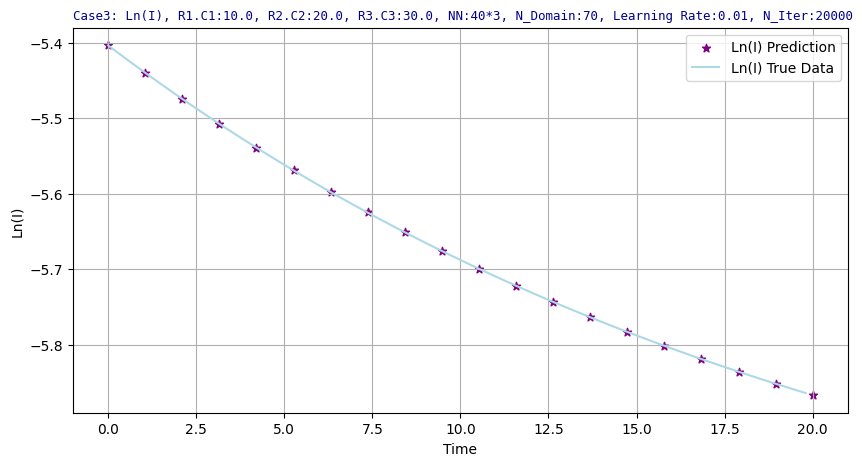

In [ ]:
#######...Ln_Case3...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Define desired values for the parameters
R_0 = 500.0
R_1 = 1000.0
R_2 = 2000.0
R_3 = 1000.0
C_1 = 0.01
C_2 = 0.01
C_3 = 0.03
U_dc = 1.0

RC1=R_1*C_1
RC2=R_2*C_2
RC3=R_3*C_3
#Time limit.
T=20.0

###########
n = 40
l = 3
Lr = 0.01
N_Iter = 20000
N_Col = 70
N_t = 100
#define the differential equation
def ode_system(t, ln_I):
    """ODE system.
    d(Ln(I1))/dt+1/(R_1*C_1)-(U_dc/R_0*R_1*C_1)*exp(-Ln(I1))=0
    d(ln(I2)/dx) + 1/(R_2*C_2) = 0
    """
    # Most backends
    ln_I1, ln_I2, ln_I3 = ln_I[:, 0:1], ln_I[:, 1:2], ln_I[:, 2:]
    dln_I1_t = dde.grad.jacobian(ln_I, t, i=0)
    dln_I2_t = dde.grad.jacobian(ln_I, t, i=1)
    dln_I3_t = dde.grad.jacobian(ln_I, t, i=2)
    # Backend jax
    # I_val, I_fn = y
    # ln_I1, ln_I2, ln_I3 = I_val[:, 0:1], I_val[:, 1:2], I_val[:, 2:]
    # dln_I1_t, _ = dde.grad.jacobian(ln_I, t, i=0)
    # dln_I2_t, _ = dde.grad.jacobian(ln_I, t, i=1)
    # dln_I2_t, _ = dde.grad.jacobian(ln_I, t, i=2)
    return [dln_I1_t + 1/(R_1*C_1)*(1 - ((U_dc/R_0) * (tf.exp(-ln_I1)))), dln_I2_t + 1 / (R_2 * C_2),  dln_I3_t + 1 / (R_3 * C_3)]



#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack((np.log((U_dc/R_1) * ((np.exp(-t/(R_1 * C_1)))) + (U_dc/R_0)), (-t/ (R_2*C_2))+ np.log(U_dc/R_2), (-t/ (R_3*C_3))+ np.log(U_dc/R_3)))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, T)

ic0 = dde.icbc.IC(geom, lambda t: np.log(U_dc * (1/R_0 + 1/R_1)), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_2)), boundary, component=1)
ic2 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_3)), boundary, component=2)

data = dde.data.PDE(geom, ode_system, [ic0, ic1, ic2], N_Col, 3, solution=func, num_test=N_t)

layer_size = [1] + [n] * l + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=Lr, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations = N_Iter)


# Generate time points for prediction
t_pred = np.linspace(0, T, 20).reshape(-1, 1)  # Reshape for compatibility with the model
ln_I_pred = model.predict(t_pred)

t_true = data.test_x
ln_I_true = data.test_y

t_train = data.train_x
ln_I_train = data.train_y

# Extract I1 and I2 from the predicted values
ln_I1_pred = ln_I_pred[:, 0]
ln_I2_pred = ln_I_pred[:, 1]
ln_I3_pred = ln_I_pred[:, 2]

I1_pred = np.exp(ln_I1_pred)
I2_pred = np.exp(ln_I2_pred)
I3_pred = np.exp(ln_I3_pred)

ln_I1_true = ln_I_true[:, 0]
ln_I2_true = ln_I_true[:, 1]
ln_I3_true = ln_I_true[:, 2]

I1_true = np.exp(ln_I1_true)
I2_true = np.exp(ln_I2_true)
I3_true = np.exp(ln_I3_true)

ln_I1_train = ln_I_train[:, 0]
ln_I2_train = ln_I_train[:, 1]
ln_I3_train = ln_I_train[:, 2]

I1_train = np.exp(ln_I1_train)
I2_train = np.exp(ln_I2_train)
I3_train = np.exp(ln_I2_train)

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred + I3_pred
I_sum_train = I1_train + I2_train+ I3_train
I_sum_true = I1_true + I2_true + I3_true

ln_I_sum_pred = np.log(I1_pred + I2_pred+ I3_pred)
ln_I_sum_train = np.log(I1_train + I2_train+ I3_train)
ln_I_sum_true = np.log(I1_true + I2_true+ I3_true)

# Create a single figure for all plots
plt.figure(figsize=(10, 5))
# Plot log(I) Prediction
plt.scatter(t_pred,  ln_I_sum_pred, label='Ln(I) Prediction', c='purple', marker='*')
# Plot log(I) Training Data as point markers
#plt.scatter(t_train, ln_I_sum_train, label='Ln(I) Training Data', c='orange', marker='o')
# Plot log(I) True Data
plt.plot(t_true, ln_I_sum_true, label='Ln(I) True Data', c='lightblue')
plt.xlabel('Time')
plt.ylabel('Ln(I)')
plt.legend()
plt.title(f'Case3: Ln(I), R1.C1:{RC1}, R2.C2:{RC2}, R3.C3:{RC3}, NN:{n}*{l}, N_Domain:{N_Col}, Learning Rate:{Lr}, N_Iter:{N_Iter}', loc='left', fontdict={'family': 'monospace', 'color':  'darkblue', 'weight': 'normal', 'size': 9})
plt.grid(True)
plt.show()


In [ ]:
!pip install -q deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.1 MB/s eta 0:00:00


Compiling model...
Building feed-forward neural network...
'build' took 0.053007 s

'compile' took 0.937720 s

Training model...

Step      Train loss                                                                                                                  Test loss                                                                                                                   Test metric   
0         [4.90e-02, 1.14e-02, 4.55e-02, 9.81e-03, 2.52e-02, 8.86e-03, 3.37e+01, 4.77e+01, 4.77e+01, 4.77e+01, 4.77e+01, 4.77e+01]    [3.58e-02, 1.19e-02, 4.13e-02, 1.11e-02, 2.04e-02, 7.31e-03, 3.37e+01, 4.77e+01, 4.77e+01, 4.77e+01, 4.77e+01, 4.77e+01]    [1.02e+00]    
1000      [5.55e-05, 1.15e-03, 5.58e-04, 3.87e-03, 3.17e-03, 1.27e-03, 4.56e-08, 1.94e-08, 4.65e-09, 8.41e-08, 6.80e-08, 2.30e-08]    [5.80e-05, 7.46e-04, 2.29e-04, 3.50e-03, 2.78e-03, 8.68e-04, 4.56e-08, 1.94e-08, 4.65e-09, 8.41e-08, 6.80e-08, 2.30e-08]    [2.02e-02]    
2000      [2.65e-05, 3.76e-05, 3.82e-05, 4.30e-05, 

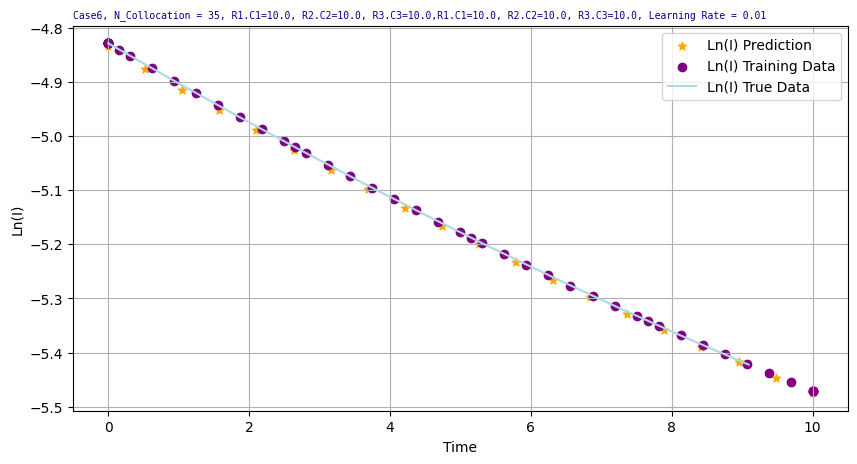

In [ ]:
#######...Ln_Case6...#######
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

#Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Define desired values for the parameters
R_0 = 500.0
R_1 = 1000.0
R_2 = 1000.0
R_3 = 1000.0
R_4 = 1000.0
R_5 = 1000.0
R_6 = 1000.0
C_1 = 0.01
C_2 = 0.01
C_3 = 0.01
C_4 = 0.01
C_5 = 0.01
C_6 = 0.01
U_dc = 1.0

n1=R_1*C_1
n2=R_2*C_2
n3=R_3*C_3
n4=R_4*C_4
n5=R_5*C_5
n6=R_6*C_6
#Time limit.
T=10.0

###########
N_collocation = 35
num_test=10
LR = 0.01

#define the differential equation
def ode_system(t, ln_I):
    """ODE system.
    d(Ln(I1))/dt+1/(R_1*C_1)-(U_dc/R_0*R_1*C_1)*exp(-Ln(I1))=0
    d(ln(I2)/dx) + 1/(R_2*C_2) = 0
    """
    # Most backends
    ln_I1, ln_I2, ln_I3, ln_I4, ln_I5, ln_I6 = ln_I[:, 0:1], ln_I[:, 1:2], ln_I[:, 2:3], ln_I[:, 3:4], ln_I[:, 4:5], ln_I[:, 5:6]
    dln_I1_t = dde.grad.jacobian(ln_I, t, i=0)
    dln_I2_t = dde.grad.jacobian(ln_I, t, i=1)
    dln_I3_t = dde.grad.jacobian(ln_I, t, i=2)
    dln_I4_t = dde.grad.jacobian(ln_I, t, i=3)
    dln_I5_t = dde.grad.jacobian(ln_I, t, i=4)
    dln_I6_t = dde.grad.jacobian(ln_I, t, i=5)
    # Backend jax
    # I_val, I_fn = y
    # ln_I1, ln_I2, ln_I3 = I_val[:, 0:1], I_val[:, 1:2], I_val[:, 2:3], I_val[:, 3:]
    # dln_I1_t, _ = dde.grad.jacobian(ln_I, t, i=0)
    # dln_I2_t, _ = dde.grad.jacobian(ln_I, t, i=1)
    # dln_I2_t, _ = dde.grad.jacobian(ln_I, t, i=2)
    # dln_I3_t, _ = dde.grad.jacobian(ln_I, t, i=3)
    return [dln_I1_t + 1/(R_1*C_1)*(1 - ((U_dc/R_0) * (tf.exp(-ln_I1)))), dln_I2_t + 1 / (R_2 * C_2), dln_I3_t + 1 / (R_3 * C_3), dln_I4_t + 1 / (R_4 * C_4), dln_I5_t + 1 / (R_5 * C_5), dln_I6_t + 1 / (R_6 * C_6)]



#define analytical solution
def func(t):
    """Exact solution for dI/dt + I/(RC) = 0"""
    # The exact solution
    return np.hstack((np.log((U_dc/R_1) * ((np.exp(-t/(R_1 * C_1)))) + (U_dc/R_0)), (-t/ (R_2*C_2))+ np.log(U_dc/R_2), (-t/ (R_3*C_3))+ np.log(U_dc/R_3), (-t/ (R_4*C_4))+ np.log(U_dc/R_4), (-t/ (R_5*C_5))+ np.log(U_dc/R_5), (-t/ (R_6*C_6))+ np.log(U_dc/R_6)))


# Define the initial condition function
def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, T)

ic0 = dde.icbc.IC(geom, lambda t: np.log(U_dc * (1/R_0 + 1/R_1)), boundary, component=0)
ic1 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_2)), boundary, component=1)
ic2 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_3)), boundary, component=2)
ic3 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_3)), boundary, component=3)
ic4 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_3)), boundary, component=4)
ic5 = dde.icbc.IC(geom, lambda t: np.log((U_dc / R_3)), boundary, component=5)

data = dde.data.PDE(geom, ode_system, [ic0, ic1, ic2, ic3, ic4, ic5], N_collocation, 6, solution=func, num_test=10)

layer_size = [1] + [40] * 3 + [6]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=LR, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)


# Generate time points for prediction
t_pred = np.linspace(0, T, 20).reshape(-1, 1)  # Reshape for compatibility with the model
ln_I_pred = model.predict(t_pred)

t_true = data.test_x
ln_I_true = data.test_y

t_train = data.train_x
ln_I_train = data.train_y

# Extract I1 and I2 from the predicted values
ln_I1_pred = ln_I_pred[:, 0]
ln_I2_pred = ln_I_pred[:, 1]
ln_I3_pred = ln_I_pred[:, 2]
ln_I4_pred = ln_I_pred[:, 3]
ln_I5_pred = ln_I_pred[:, 4]
ln_I6_pred = ln_I_pred[:, 5]

I1_pred = np.exp(ln_I1_pred)
I2_pred = np.exp(ln_I2_pred)
I3_pred = np.exp(ln_I3_pred)
I4_pred = np.exp(ln_I4_pred)
I5_pred = np.exp(ln_I5_pred)
I6_pred = np.exp(ln_I6_pred)


ln_I1_true = ln_I_true[:, 0]
ln_I2_true = ln_I_true[:, 1]
ln_I3_true = ln_I_true[:, 2]
ln_I4_true = ln_I_true[:, 3]
ln_I5_true = ln_I_true[:, 4]
ln_I6_true = ln_I_true[:, 5]

I1_true = np.exp(ln_I1_true)
I2_true = np.exp(ln_I2_true)
I3_true = np.exp(ln_I3_true)
I4_true = np.exp(ln_I4_true)
I5_true = np.exp(ln_I5_true)
I6_true = np.exp(ln_I6_true)

ln_I1_train = ln_I_train[:, 0]
ln_I2_train = ln_I_train[:, 1]
ln_I3_train = ln_I_train[:, 2]
ln_I4_train = ln_I_train[:, 3]
ln_I5_train = ln_I_train[:, 4]
ln_I6_train = ln_I_train[:, 5]

I1_train = np.exp(ln_I1_train)
I2_train = np.exp(ln_I2_train)
I3_train = np.exp(ln_I2_train)
I4_train = np.exp(ln_I4_train)
I5_train = np.exp(ln_I5_train)
I6_train = np.exp(ln_I6_train)

# Calculate the sum of I1 and I2
I_sum_pred = I1_pred + I2_pred + I3_pred+ I4_pred+ I5_pred+ I6_pred
I_sum_train = I1_train + I2_train+ I3_train+ I4_train+ I5_train+ I6_train
I_sum_true = I1_true + I2_true + I3_true + I4_true + I5_true + I6_true

ln_I_sum_pred = np.log(I1_pred + I2_pred+ I3_pred + I4_pred + I5_pred+ I6_pred)
ln_I_sum_train = np.log(I1_train + I2_train+ I3_train + I4_train + I5_train+ I6_train)
ln_I_sum_true = np.log(I1_true + I2_true + I3_true + I4_true + I5_true + I6_true)

# Create a single figure for all plots
plt.figure(figsize=(10, 5))
# Plot log(I) Prediction
plt.scatter(t_pred,  ln_I_sum_pred, label='Ln(I) Prediction', c='orange', marker='*')
# Plot log(I) Training Data as point markers
plt.scatter(t_train, ln_I_sum_train, label='Ln(I) Training Data', c='purple', marker='o')
# Plot log(I) True Data
plt.plot(t_true, ln_I_sum_true, label='Ln(I) True Data', c='lightblue')
plt.xlabel('Time')
plt.ylabel('Ln(I)')
plt.legend()
plt.title(f'Case6, N_Collocation = {N_collocation}, R1.C1={n1}, R2.C2={n2}, R3.C3={n3},R1.C1={n4}, R2.C2={n5}, R3.C3={n6}, Learning Rate = {LR}', loc='left', fontdict={'family': 'monospace', 'color':  'darkblue', 'weight': 'normal', 'size': 7})
plt.grid(True)
plt.show()


Compiling model...
Building feed-forward neural network...
'build' took 0.071447 s

'compile' took 1.021109 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [2.58e-02, 4.77e+01]    [2.55e-02, 4.77e+01]    [1.05e+00]    
1000      [1.49e-04, 6.19e-09]    [1.32e-04, 6.19e-09]    [2.52e-03]    
2000      [5.81e-06, 6.57e-11]    [4.05e-06, 6.57e-11]    [2.25e-04]    
3000      [2.44e-06, 1.46e-11]    [2.01e-06, 1.46e-11]    [1.37e-04]    
4000      [8.69e-07, 3.64e-12]    [7.13e-07, 3.64e-12]    [8.48e-05]    
5000      [8.88e-06, 1.46e-08]    [8.03e-06, 1.46e-08]    [3.20e-04]    
6000      [1.29e-05, 8.79e-04]    [1.19e-05, 8.79e-04]    [2.77e-03]    
7000      [3.22e-06, 1.67e-08]    [2.62e-06, 1.67e-08]    [2.44e-04]    
8000      [5.45e-06, 1.98e-05]    [5.16e-06, 1.98e-05]    [9.27e-04]    
9000      [6.69e-07, 5.46e-08]    [4.56e-07, 5.46e-08]    [1.04e-04]    
10000     [5.34e-07, 1.77e-06]    [3.81e-07, 1.77e-06]    [2.01e-04

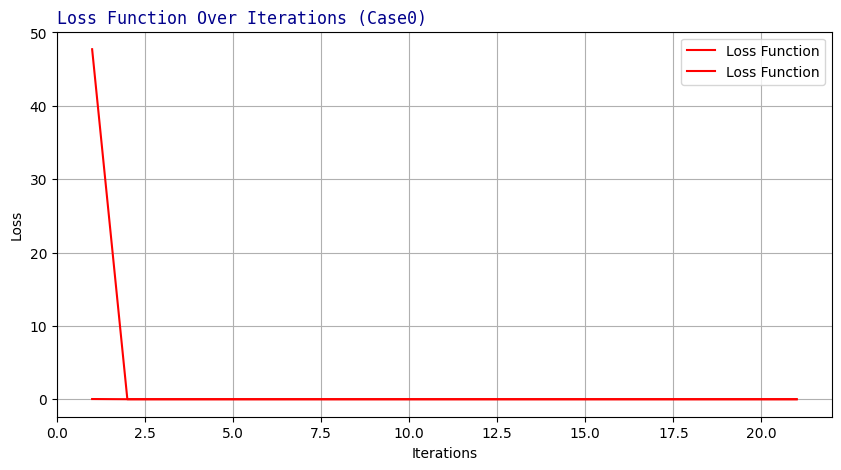

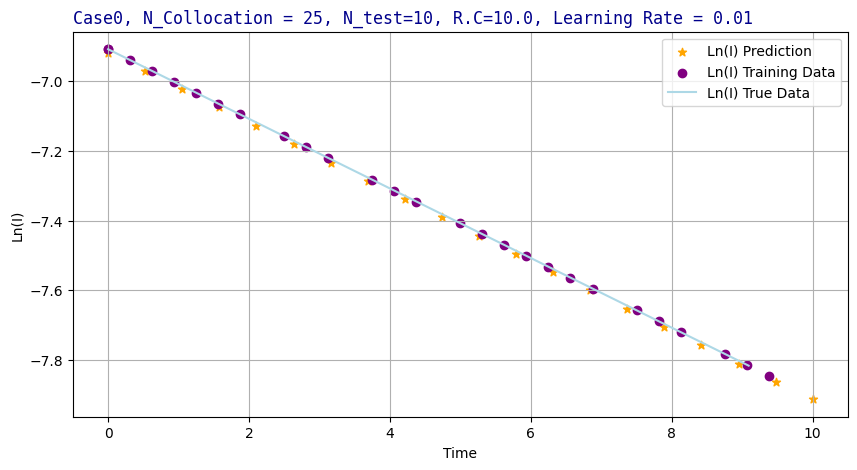

In [ ]:
###### Ln_Case0 #####
import matplotlib.pyplot as plt
import tensorflow as tf
import deepxde as dde
import numpy as np
import random

# Set a seed for reproducibility
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Constant parameters.
R = 1000.0
C = 0.01
U = 1.0
n = R * C
# Time limit.
T = 10.0

###########
N_collocation = 25
num_test = 10
lr = 0.01
###########

def ode_system(x, ln_I):
    """ODE for d(ln(I)/dx) + 1/(RC) = 0"""
    dln_I_dx = dde.grad.jacobian(ln_I, x)
    # Calculate the derivative of ln(I) directly
    return dln_I_dx + 1 / (R * C)

def func(x):
    """Exact solution for d(ln(I)/dx) + 1/(RC) = 0"""
    # The exact solution
    return (-x / (R * C)) + np.log(U / R)

geom = dde.geometry.TimeDomain(0, T)

# Define boundary conditions using DirichletBC
def boundary(_, on_initial):
    return on_initial

# Define the initial condition function
def initial_condition(x):
    return np.log(U / R)  # Initial condition is constant

ic = dde.icbc.IC(geom, lambda x: np.log(U / R), boundary, component=0)  # Initial condition

data = dde.data.PDE(geom, ode_system, [ic], N_collocation, 1, solution=func, num_test=10)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=lr, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

# Generate time points for prediction
t_pred = np.linspace(0, T, 20).reshape(-1, 1)  # Reshape for compatibility with the model
ln_I_pred = model.predict(t_pred)

t_true = data.test_x
ln_I_true = data.test_y

t_train = data.train_x
ln_I_train = data.train_y

# Plot loss function over iterations
loss_history = losshistory.loss_train
iterations = list(range(1, len(loss_history) + 1))

plt.figure(figsize=(10, 5))
plt.plot(iterations, loss_history, label="Loss Function", c="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss Function Over Iterations (Case0)", loc="left", fontdict={"family": "monospace", "color": "darkblue", "weight": "normal", "size": 12})
plt.grid(True)
plt.show()

# Plot Ln(I) predictions and true data
plt.figure(figsize=(10, 5))
plt.scatter(t_pred, ln_I_pred, label="Ln(I) Prediction", c="orange", marker="*")
plt.scatter(t_train, ln_I_train, label="Ln(I) Training Data", c="purple", marker="o")
plt.plot(t_true, ln_I_true, label="Ln(I) True Data", c="lightblue")
plt.xlabel("Time")
plt.ylabel("Ln(I)")
plt.legend()
plt.title(f"Case0, N_Collocation = {N_collocation}, N_test={num_test}, R.C={n}, Learning Rate = {lr}", loc="left", fontdict={"family": "monospace", "color": "darkblue", "weight": "normal", "size": 12})
plt.grid(True)
plt.show()

In [ ]:
losshistory.loss_train

# Comments

In [ ]:
!pip install -q deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 11.1 MB/s eta 0:00:00


In [ ]:
losshistory.loss_test

[array([1.1625491e-02, 4.7717083e+01], dtype=float32),
 array([9.9653825e-03, 2.4760993e-10], dtype=float32),
 array([6.6067604e-03, 1.9877575e-07], dtype=float32),
 array([0.00013571, 0.00010975], dtype=float32),
 array([5.934427e-05, 1.114131e-09], dtype=float32),
 array([7.5009171e-05, 1.0027179e-10], dtype=float32),
 array([5.3999323e-05, 1.4551915e-11], dtype=float32),
 array([4.7674090e-05, 6.3869265e-10], dtype=float32),
 array([6.2886720e-05, 4.6239828e-04], dtype=float32),
 array([1.7403901e-05, 3.4141578e-06], dtype=float32),
 array([1.5700924e-05, 8.5609645e-05], dtype=float32),
 array([1.6922340e-05, 4.1438852e-09], dtype=float32),
 array([2.0331474e-06, 3.1127456e-10], dtype=float32),
 array([3.9356437e-06, 1.7482704e-04], dtype=float32),
 array([3.5497567e-06, 2.1614710e-07], dtype=float32),
 array([4.9486707e-06, 1.5734386e-04], dtype=float32),
 array([6.0143402e-06, 1.7012667e-07], dtype=float32),
 array([1.0993444e-05, 2.5364898e-08], dtype=float32),
 array([1.18868475

In [ ]:
losshistory.loss_train

[array([1.2072894e-02, 4.7717083e+01], dtype=float32),
 array([9.0170698e-03, 2.4760993e-10], dtype=float32),
 array([5.5918242e-03, 1.9877575e-07], dtype=float32),
 array([0.00010169, 0.00010975], dtype=float32),
 array([3.4611423e-07, 1.1141310e-09], dtype=float32),
 array([3.6166746e-06, 1.0027179e-10], dtype=float32),
 array([5.1211742e-07, 1.4551915e-11], dtype=float32),
 array([5.8071504e-07, 6.3869265e-10], dtype=float32),
 array([4.9888959e-06, 4.6239828e-04], dtype=float32),
 array([1.1940935e-07, 3.4141578e-06], dtype=float32),
 array([1.0133255e-07, 8.5609645e-05], dtype=float32),
 array([6.1913163e-08, 4.1438852e-09], dtype=float32),
 array([3.2904459e-09, 3.1127456e-10], dtype=float32),
 array([9.2082519e-07, 1.7482704e-04], dtype=float32),
 array([4.7859365e-09, 2.1614710e-07], dtype=float32),
 array([4.8950011e-07, 1.5734386e-04], dtype=float32),
 array([1.3698156e-09, 1.7012667e-07], dtype=float32),
 array([5.7333605e-08, 2.5364898e-08], dtype=float32),
 array([2.240725

In [ ]:
losshistory.metrics_test

[[1.0193428],
 [0.28248695],
 [0.21620159],
 [0.19891398],
 [0.1945439],
 [0.19083796],
 [0.18919502],
 [0.19846657],
 [0.19519387],
 [0.2446283],
 [0.23481038],
 [0.21965401],
 [0.35540769],
 [0.3582662],
 [0.32415694],
 [0.29847872],
 [0.2891915],
 [0.4870555],
 [0.48635635],
 [0.4313238],
 [0.40336552]]

In [ ]:
losshistory.steps

[0,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000]

In [ ]:
import pandas as pd
df=pd.DataFrame(index=losshistory.steps,columns=['loss_train_1','loss_train_2','loss_test_1','loss_test_2','metric_test'])
df['metric_test']=np.array(losshistory.metrics_test).flatten()
df['loss_train_1']=np.array(losshistory.loss_train)[:,0]
df['loss_train_2']=np.array(losshistory.loss_train)[:,1]
df['loss_test_1']=np.array(losshistory.loss_test)[:,0]
df['loss_test_2']=np.array(losshistory.loss_test)[:,1]
df


,loss_train_1,loss_train_2,loss_test_1,loss_test_2,metric_test
0,1.207289e-02,4.771708e+01,0.011625,4.771708e+01,1.019343
1000,9.017070e-03,2.476099e-10,0.009965,2.476099e-10,0.282487
2000,5.591824e-03,1.987758e-07,0.006607,1.987758e-07,0.216202
3000,1.016930e-04,1.097489e-04,0.000136,1.097489e-04,0.198914
4000,3.461142e-07,1.114131e-09,0.000059,1.114131e-09,0.194544
5000,3.616675e-06,1.002718e-10,0.000075,1.002718e-10,0.190838
6000,5.121174e-07,1.455192e-11,0.000054,1.455192e-11,0.189195
7000,5.807150e-07,6.386927e-10,0.000048,6.386927e-10,0.198467
8000,4.988896e-06,4.623983e-04,0.000063,4.623983e-04,0.195194
9000,1.194093e-07,3.414158e-06,0.000017,3.414158e-06,0.244628


In [ ]:
np.array(losshistory.loss_train)[:,0]

array([1.2072894e-02, 9.0170698e-03, 5.5918242e-03, 1.0169305e-04,
       3.4611423e-07, 3.6166746e-06, 5.1211742e-07, 5.8071504e-07,
       4.9888959e-06, 1.1940935e-07, 1.0133255e-07, 6.1913163e-08,
       3.2904459e-09, 9.2082519e-07, 4.7859365e-09, 4.8950011e-07,
       1.3698156e-09, 5.7333605e-08, 2.2407256e-08, 1.1531996e-05,
       8.3302957e-08], dtype=float32)